<div class="alert" style="background-color:turquoise; border-radius : 20px;text-align:center; color : white">
    
#  Journée JEDI 2023 - Parcours intermédiaire

<p>Cette activité est proposée par Dominique Payant, Vincent Lambour, Marie Holzer et Noël Gillet, membres du groupe IREM Informatique. </p>
<p><em>Licence: CC BY-SA</em></p>

# Activité 2: Les arbres de la métropole de Tours

Cette balade à l'ombre dans les rues de Tours sera l'occasion de manipuler les modules csv, matplotlib et folium pour traiter des données et produire quelques graphiques.

**Au sommaire :**

<details> 

- CSV
    - Présentation    
    - Exploration du fichier arbres-tours.csv dans un tableur
    
    
- Importation des données dans un code Python
    - Importation, liste de dictionnaires (n-uplets nommés)    
    - Algorithmes de requêtes sur une base de données 
    
    
- Entracte : Validation de données, transtypage

- Représentations graphiques avec MATPLOTLIB
    - Histogramme et camembert    
    - Nuage de points
    
    
- Localisation avec FOLIUM

</details> 


## CSV


Comme de nombreux services publics, la métropole de Tours donne accès librement à de nombreux jeux de données de données.

Suivre ce lien pour explorer : [https://data.tours-metropole.fr/pages/home/](https://data.tours-metropole.fr/pages/home/).

Le fichier qui va servir de support est celui qui répertorie les arbres enracinés sur les voies publiques de la métropole (ce qui inclut les rues, les places, les parcs publics ainsi que les rives du Cher et de la Loire).

Le format du fichier est **CSV** pour **C**omma **S**eparated **V**alues. 

!!! info  Rappel sur le format CSV

**L'encodage**

Un fichier CSV est un fichier texte (c'est-à-dire que les octets qui le composent doivent être interprétés comme des codes de caractères).

Comme presque toujours sur le Web, les caractères sont bien encodés en **UTF-8** (il convient de garder l'encodage proposé par défaut dans notre cas).

**Séparateur de cellules**

Les données contenues dans un fichier CSV correspondent à des **données tabulées**. Les lignes sont naturellement séparées par un caractère de saut de ligne (celui qui correspond à la touche Entrée du clavier).

Les cellules d'une même ligne sont en théorie séparées par une **virgule** (*comma* signifie d'ailleurs *virgule* en anglais). Toutefois il est courant pour les fichiers en langue française de privilégier l'usage du **point virgule**. Cette précaution est dû au fait que les valeurs numériques flottantes utilisent une virgule pour séparer la partie entière de la partie décimale, menant à une confusion parfois facheuse...

**Enregistrements et descripteurs**

Chaque ligne du fichier correspond à un **enregistrement** dans la table. Chaque colonne du fichier correspond à un attribut de l'enregistrement, décrit par un **descripteur**. Bien souvent la première ligne d'un fichier csv fournit l'ensemble des descripteurs du fichier. 
!!!

### Étape 1

Télécharger le fichier : [arbres-tours.csv](https://data.tours-metropole.fr/explore/dataset/arbres-tours/export/)


### Étape 2 : Découverte du fichier dans un tableur

<details>
    

Ouvrir le fichier dans un tableur.

Une fenêtre modale similaire à la suivante doit se soumettre à votre sagacité.

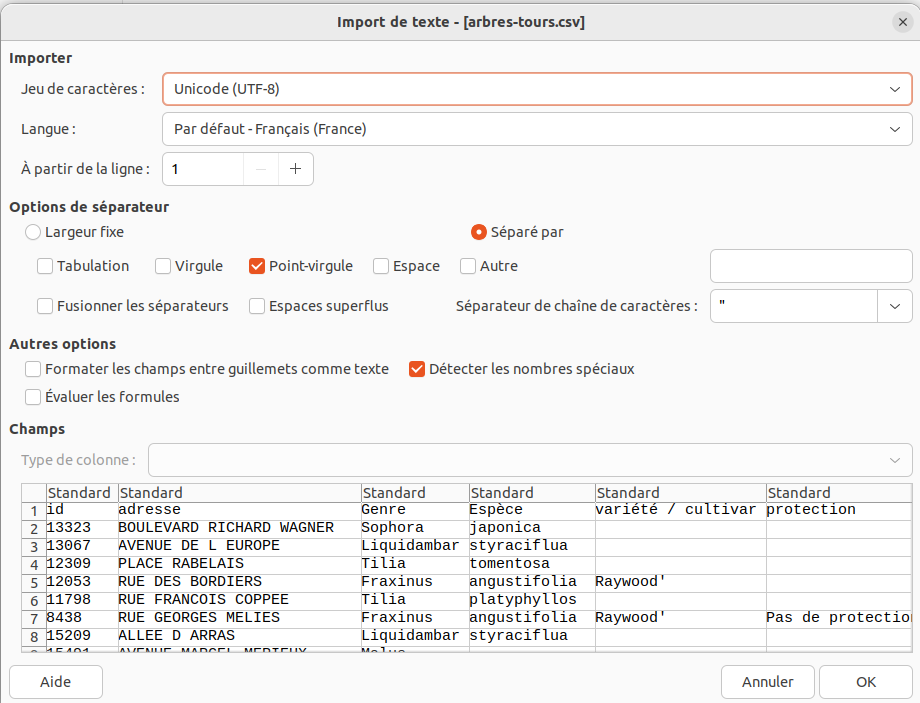

Comme on le voit dans l'aperçu proposé, la première ligne forme les titres des colonnes (les descripteurs).

Chaque ligne correspond à un arbre.

**Questions**
    
    1. Combien la table contient-elle d'arbres ?
    2. Combien de descripteurs sont utilisés pour chaque arbre ?
    3. Combien d'arbres du genre Tilia dénombre-t-on ? 
</details>
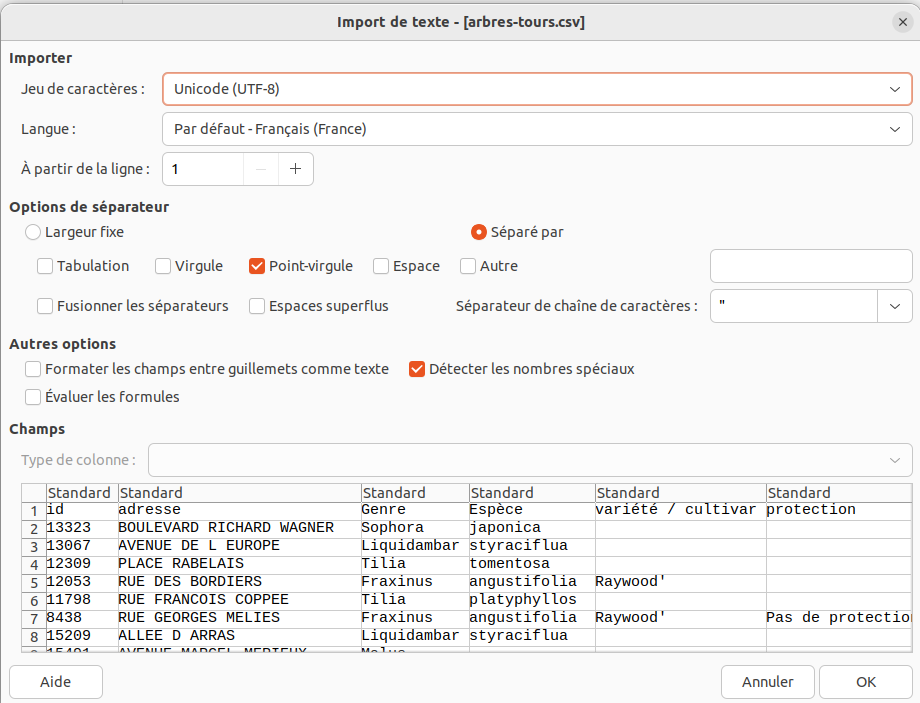

# Python et le module `csv`

Une version du fichier csv est jointe à ce notebook Jupyter.

Nous allons dans un premier temps récupérer les données sous la forme d'une **liste de dictionnaire** que nous manipulerons afin d'exécuter certaines requêtes sur ces données


## Étape 3 : Lecture du CSV en Python

Nous utilisons le module csv de Python dont la documentation est lisible ici :
https://docs.python.org/fr/3/library/csv.html

Exécuter la cellule de code Python ci-dessous (bouton *Exécuter* dans la barre de menu).
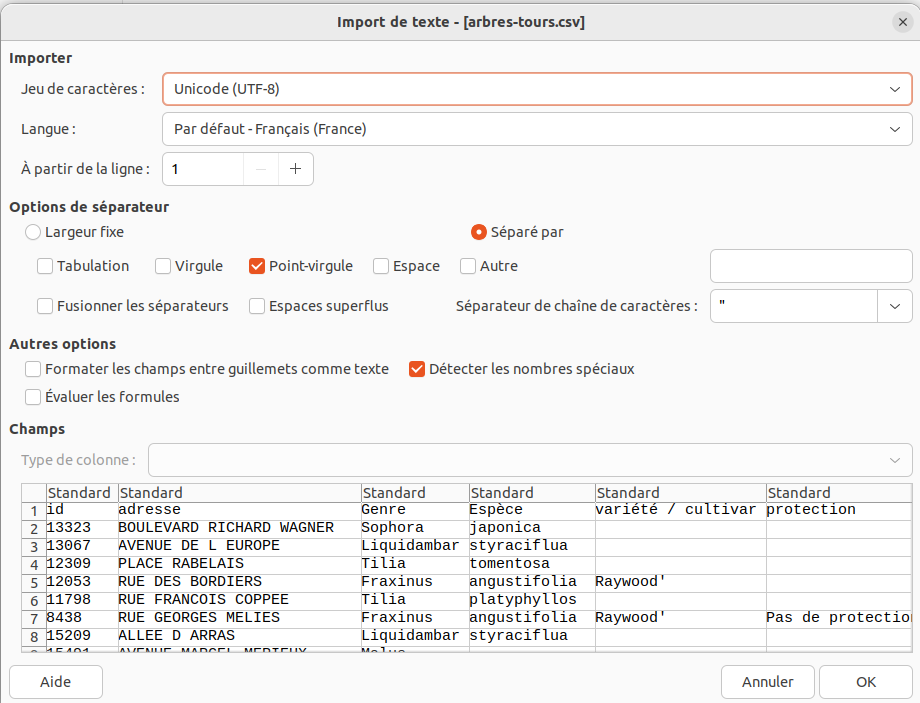

In [ ]:
import csv  # importation du module csv

with open("arbres-tours.csv") as fichier:       # Lecture du fichier arbres-tours.csv
    table=list(csv.DictReader(fichier, delimiter = ";"))  # Extraction de la liste des dictionnaires
print("Fichier correctement chargé en mémoire !")

Comment faire ça chez soi ?

<details>
Le fichier CSV a été joint à ce notebook. Pour faire la même manipulation sur un poste avec un interpréteur Python, il suffit de déposer le fichier CSV dans le même répertoire que le code Python. Si vous utilisez l'EDI Pyzo, attention au mode d'exécution (il faut exécuter le fichier Python pour avoir accès au répertoire).
    
Le fichier CSV a été légérement modifié (pour supprimer le premier caractère du fichier original qui transforme le nom du descripteur `'id'` en `'\ufeffid'`</details>

!!! info À propos du code
    
Le bloc `with` ouvre le fichier et le ferme automatiquement à la fin du bloc (sans avoir d'appeler `fichier.close()`).
    
    
On choisit ici d'extraire les données en faisant appel à la classe `DictReader` du module `csv` qui convertit chaque ligne du tableau en dictionnaire. Chaque enregistrement se présente sous la forme d'un dictionnaire dont les clés sont les descripteurs du fichier.

On remarque qu'il a fallu définir l'argument facultatif `delimiter` pour notifier que les cellules sont séparées par des **;** et non des **,**.

`csv.DictReader` est un objet _iterable_. On peut donc parcourir chacun des enregistrements dans une boucle. Python permet de le convertir très simplement en un objet de type `list`, ce qui est plus clair et suffisant pour le travail suivant.
!!!

<details><summary><strong>> Détail sur la classe DictReader</strong></summary>
Si votre version de Python est la 3.6 ou 3.7, chaque enregistrement récupéré avec la classe `DictReader` sera représenté non pas par un dictionnaire classique (de type `dict`) mais par un objet de type <a href="https://docs.python.org/3/library/collections.html#collections.OrderedDict">OrderedDict</a> du module <code>collection</code>. Le fonctionnement reste identique à celui d'un dictionnaire, avec en plus quelques fonctionnalités supplémentaires.
</details>

!!! warning Convention de nommage

C'est l'occasion de rappeler que la convention PEP 8 (lisible ici : https://peps.python.org/pep-0008/) recommande de suivre le style _CapWords_ (aussi appelé [CamelCase](https://fr.wikipedia.org/wiki/Camel_case)) pour les noms des classes. Pour les noms de fonctions et les variables, on utilisera uniquement des lettres minuscules et des *underscore* (tirets du 8) 
!!!

## Étape 4 : Exploration des données importées dans l'interpréteur Python

Maintenant que nous avons importé les données de notre fichier csv et que nous avons à notre disposition un objet Python servant d'interface à ces données, il ne reste plus qu'à les **parcourir** ! Par la suite, nous utiliserons volontairement un vocabulaire issu des **bases de données**, afin de faire le lien avec ce domaine de l'informatique (qui fait partie du programme de NSI)

Nous commencons par tenter de répondre à des questions simples, comme déterminer le nombre d'arbres dans le jeu de données ou encore afficher certains arbres. Dans l'étape suivante, nous nous attaquerons à des requêtes plus complexes.

**Question :** Combien la `table` contient-elle d'enregistrements ? 

_Répondre à l'aide d'une ligne de code Python._

In [ ]:
# Compléter ici le code Python à exécuter pour répondre


**Question :** Afficher le contenu du premier arbre de la `table` (et seulement lui)

**Question :** Afficher le dernier enregistrement de la `table` (et seulement le dernier).

## Étape 5: Quelques algorithmes de requêtes sur une base de données

Passons maintenant à des **requêtes de sélection simples**.


**Question :** Coder une fonction `recherche_arbre(table, id)` qui recherche et renvoie l'arbre (c'est-à-dire le dictionnaire le décrivant) et dont l'`id` est spécifié en argument de la fonction.

<details>
    
- Comme pour tous les champs de la `table`, `id` est associé à une valeur de type `str` (chaîne de caractères).
    
- Si l'`id` n'est pas présent dans la table, on s'attend à ce que la valeur de retour soit `None`.
</details>

In [ ]:
def recherche_arbre(table,identifiant):
    """Recherche et renvoie l'arbre (i.e. le dictionnaire 
    le décrivant) dont l'id est spécifié en argument."""
    pass
            
recherche_arbre(table,'13170')  

**Question :** Coder une fonction `recherche_genre(genre)` qui renvoie la liste de tous les arbres du genre recherché.

La fonction renvoie un objet qui a la même structure que `table` : c'est une liste de dictionnaire.


In [ ]:
def recherche_genre(table, genre):
    """Renvoie la liste des arbres du genre spécifié en argument.
    genre est du type str"""
    pass

recherche_genre(table, 'Acacia')

In [ ]:
# alternative :

def recherche_genre(table,genre):
    """Renvoie la liste des arbres du genre spécifié en arrgument.
    genre est du type str"""
    pass

recherche_genre(table,'Olea')

**Question :** Coder une fonction `recherche_secteur(secteur)` qui renvoie la liste de tous les arbres du `secteur`.

In [ ]:
def recherche_secteur(table,secteur):
    """Renvoie la liste des arbres du genre spécifié en argument.
    secteur est du type str"""
    pass

In [ ]:
len(recherche_secteur(table, "Secteur Europe"))

**Question :** Sans coder une nouvelle fonction, déterminer la liste des _Prunus_ dans le secteur _Europe_.

In [ ]:
len(recherche_genre(recherche_secteur(table,'Secteur Europe'), 'Prunus'))

**Question :** Coder une fonction `effectifs_secteur(table)` qui renvoie un dictionnaire dont :

* les clés sont les secteurs de la métropole de Tours (clé de type `str`) ;
* les valeurs associées aux clés comptent le nombre d'arbres référencés dans le secteur (valeur de type `int`).

Le paramètre `table` est une liste d'arbres (liste de dictionnaires). Ce pourrait être un extrait de la base de données `table` issue du CSV, ou bien la `table` complète.

In [ ]:
def effectifs_secteur(table):
    pass
        
effectifs_secteur(table)   

**Question :** Coder une fonction `effectifs_genre(table)` qui renvoie le dictionnaire des effectifs selon les différents genres d'arbres dans `table`

In [ ]:
def effectifs_genre(table):
    """Cette fonction renvoie un dictionnaire.
    Les clés sont les genres existants dans la table passée paramètre 
    (exemples : 'Abizia', 'Tilia'...).
    La valeur associée est l'effectif de ce genre d'arbre (nombre d'occurences)"""
    pass
effectifs_genre(table)    

La fonction `reduction` suivante prend en paramètre un dictionnaire d'effectifs (comme en renvoient les deux fonctions précédentes) et fait disparaître toutes les entrées dont l'effectif est inférieur au `seuil`. Les entrées supprimées sont agglomérées dans une classe `autre`.

In [ ]:
def reduction(effectifs, seuil):
    pass    

In [ ]:
# pour ne retenir que les genres qui comptent au moins 1000 spécimens
reduction(effectifs_genre(table), 1000)

# Entracte : validation de données

Pour l'instant, toutes les valeurs dans `table` sont brutes. En particulier, ce sont toutes des chaînes de caractères. Certaines informations sont potentiellement incomplètes ou erronées, d'autres dans des formats peu pratiques, et enfin, de nombreux champs nous sont inutiles. Typiquement, la circonférence ou la hauteur d'un arbre devraient être des valeurs numériques et pas des chaînes de caractères.

Le code suivant va extraire seulement les colonnes pertinentes pour la suite et les transtyper (changer leur type) au besoin.



In [ ]:
# Code à exécuter pour poursuivre
{'id': '13170', 'adresse': 'PLACE DE LA LIBERTE', 'Genre': 'Albizia', 'Espèce': 'julibrissin', 
 'variété / cultivar': '', 'protection': '', 'circonférence descriptif': '0,5 à 1', 'circonference_mini': '0.5', 
 'circonference_maxi': '1.0', 'nature_du_sol': '', 'taux_de_fréquentation': 'Lieu très fréquenté', 
 'position': 'Zones de stationnement', 'hauteur Descriptif': '5 à 10', 'hauteur_mini': '5.0', 
 'hauteur_maxi': '10.0', 'substrat': '', 'type_de_traitement': 'Libre accompagné', 'Geo Point': 
 '47.3794338201, 0.692762956', 'Geo Shape': '{"coordinates": [0.692762956, 47.3794338201], "type": "Point"}', 
 'id_sig': '13170', 'id_expert': '13170', 'secteur': 'Secteur Rives du Cher', 'assemblee': 'Centre Ouest'}

# Construction d'une nouvelle table nommée arbres

tours = [] # liste des enregistrements reformatés

for enregistrement in table:
    arbre = {} # initialisation d'une nouvelle entrée dans la base
    
    # id : int
    arbre['id']= int(enregistrement['id'])
    
    # adresse : str
    arbre['adresse'] = enregistrement['adresse']
    
    # Genre : str
    arbre['Genre'] = enregistrement['Genre']
    
    # circonference : float
    # les valeurs sont spécifiées par intervalle. On retient le centre de la classe
    # l'information est parfois lacunaire : on ignore les arbres dans ce cas-là
    if enregistrement['circonference_mini']=='':
        continue # l'enregistrement de l'arbre est incomplet : on l'ignore
    cmin = float(enregistrement['circonference_mini'])
    if enregistrement['circonference_maxi'] == '':
        cmax = 5.25 # dans la dernière tranche
    else:
        cmax = float(enregistrement['circonference_maxi'])
    c = (cmin + cmax) / 2
    arbre["circonference"] = c
    
    # hauteur : float
    # les valeurs sont spécifiées par intervalle. On retient le centre de la classe
    # on ignore les arbres dont l'information hauteur est manquante
    
    hmin = float('0'+enregistrement['hauteur_mini']) # nul si vide
    hmax = float('0'+enregistrement['hauteur_maxi']) # nul si vide
    if hmax == 0: # la hauteur max de la dernière classe n'est pas renseignée
        hmax = hmin + 5.0
    h = (hmin + hmax)/2
    if h>0:
        arbre['hauteur'] = h
    else:
        # On ignore les arbres dont la hauteur est mal définie
        continue
        
    #latitude: float, longitude: float 
    arbre['latitude'], arbre['longitude'] = eval(enregistrement['Geo Point'])
    
    # secteur : str
    arbre['secteur'] = enregistrement['secteur']
    
    tours.append(arbre)

In [ ]:
len(tours)

In [ ]:
print(tours[3458])

## Étape 6: Quelques algorithmes de requêtes agrégatives

Les fonctions précédentes permettent de **filtrer** les données en fonction de certains critères. Nous nous intéressons maintenant à pouvoir **agréger** les données afin de trouver les arbres maximisant ou minisant un critère, ou encore faire la moyenne des valeurs des arbres sur certains critères.

**Question :** Écrire une fonction qui renvoie la hauteur maximale des arbres de la ville.

In [ ]:
# Écrire le code ici
def hauteur_max(table):
    pass

hauteur_max(tours) # et non pas table...

**Question :** Écrire une fonction qui renvoie la liste tous les arbres de hauteur maximale. *Indice : on pourra se servir de la fonction précédente*

**Question :** Écrire une fonction qui calcule la latitude moyenne et longitude moyenne. La valeur de retour est un couple `(latitude, longitude)`

In [ ]:
def coord_moyenne(table):
    pass

coord_moyenne(tours)

## Représentation graphique avec MATPLOTLIB

Intéressons-nous maintenant à la représentation graphique des données. Le module [matplotlib](https://matplotlib.org/) est un outil de référence pour la visualisation de données en Python.

L'exemple suivant montre comment tracer le diagramme circulaire (le "camembert") des effectifs des principaux genres d'arbres.

In [ ]:
# Préparation des données à représenter

# Les effectifs des principaux genres d'arbres
effectifs_par_genre = reduction(effectifs_genre(tours), 1000) 


genres    = list(effectifs_par_genre.keys())
effectifs = list(effectifs_par_genre.values())

print(effectifs_par_genre)
print(genres)
print(effectifs)

In [ ]:
# Représentation graphique sous forme de camembert

# Importation du module
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

# ajout d'un camembert :
ax.pie(effectifs, labels=genres)

# affichage
plt.show()

## Étape 7 : Graphique des effectifs par secteur

**Question :** Construire le diagramme circulaire représentant la proportion d'arbres dans chaque quartier de la ville.

In [ ]:
eff = effectifs_secteur(table)

fig, ax = plt.subplots()
ax.pie(list(eff.values()), labels = list(eff.keys()))
plt.show()

# Un exemple de nuage de points

On se demande dans quelle mesure la hauteur d'un arbre est corrélée à sa circonférence, et si oui, selon quel modèle.

On représente alors un nuage de points (en abscisse les hauteurs, en ordonnées les circonférences).

In [ ]:
# Extraction de la liste des hauteurs 
hauteurs = [arbre['hauteur'] for arbre in tours]

# Extraction de la liste des circonférences 
circonferences = [arbre['circonference'] for arbre in tours]

fig, ax = plt.subplots()
# méthode plot pour les représentations x/y
ax.plot(hauteurs, circonferences, '.')

plt.show()

# Étape 8 : Localisation sur une carte

Pour visualiser les arbres sur une carte, il est possible d'utiliser le module [folium](https://python-visualization.github.io/folium/).

Voici un exemple permettant d'afficher le dixième arbre du jeu de données.

In [ ]:
import folium

carte = folium.Map(location=[47.39633755304364, 0.6912282480286247], zoom_start=14)
folium.Marker(
    [tours[10]['latitude'], tours[10]['longitude']], popup=tours[10]['Genre'], tooltip="Clic here"
).add_to(carte)

# Afficher la carte :
carte

**Question**

En s'aidant de l'exemple précédent, placer sur une carte les arbres du genre _Calocedrus_

In [ ]:
# ecrire le code Python ici

!!! success Vous avez terminé, bravo!

Vous avez pu découvrir ou bien approfondir l'utilisation de différents modules :

- `csv` pour la manipulation de fichiers csv
- `matplotlib` pour la visualisation de données
- `folium` pour l'affichage de données géolocalisées

Cependant nous ne pouvons que vous invitez à aller plus loin en consultant la **documentation** de ces différents modules. 

**D'autres modules existent bien sur!** Pour la manipulation de fichier csv, le module [pandas]() est par exemple très populaire. Il est notamment possible de filtrer les données directement avec les objets proposés par pandas. Cela en fait un outil plus complet mais également plus complexe...

Il est possible d'adapter cette activité afin de la proposer **à vos élèves**. Elle se prête notamment très bien aux élèves de première NSI afin d'aborder le chapitre sur les données en table.
!!!

!!! warning Avant de partir !
Il est toujours bon de faire soi-même un bilan des notions étudiées lors d'une activité. Le pochain bloc est dédié à cela! N'hésitez pas à noter les points qui vous ont semblé essentiels.
!!!

**Votre bilan** :

A vous d'écrire...